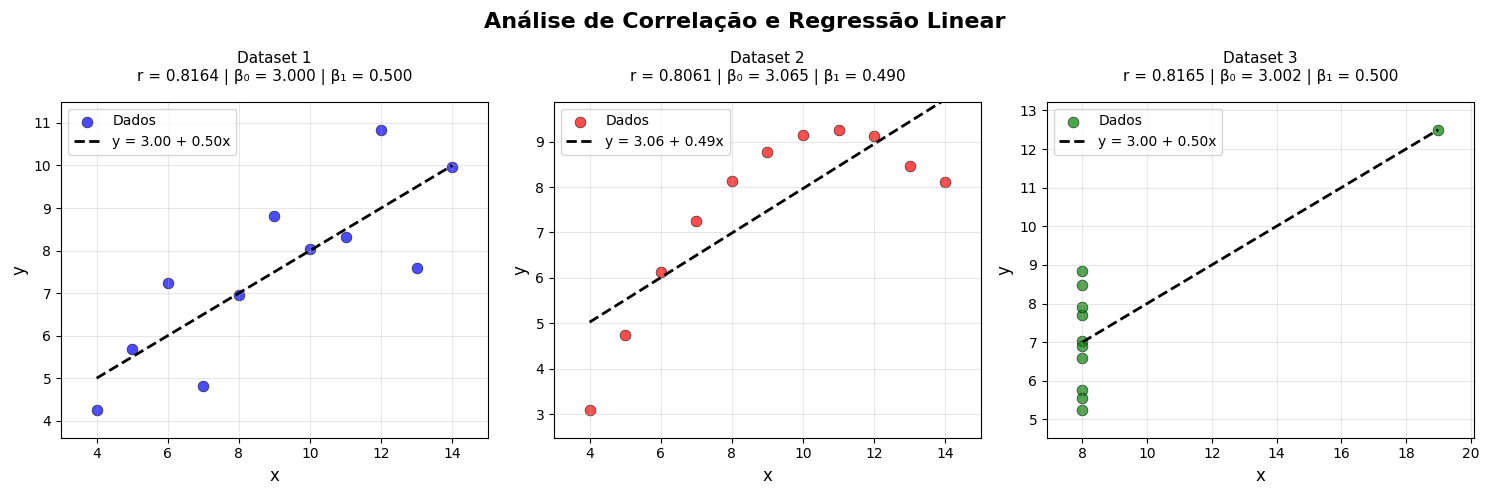

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def media(vetor):
    return sum(vetor) / len(vetor)

def correlacao(x, y):
    # Calcula médias
    x_media = media(x)
    y_media = media(y)
    
    # Fórmula: r = Σ(x-x̄)(y-ȳ) / √[Σ(x-x̄)² * Σ(y-ȳ)²]
    numerador = sum((xi - x_media) * (yi - y_media) for xi, yi in zip(x, y))  # Covariância
    soma_x_quadrado = sum((xi - x_media) ** 2 for xi in x)                     # Variância x
    soma_y_quadrado = sum((yi - y_media) ** 2 for yi in y)                     # Variância y
    denominador = (soma_x_quadrado * soma_y_quadrado) ** 0.5                   # Produto desvios
    
    return numerador / denominador  # Correlação r (-1 a +1)

def regressao(x, y):
    # Calcula médias
    x_media = media(x)
    y_media = media(y)
    
    # Fórmulas: β₁ = Σ(x-x̄)(y-ȳ) / Σ(x-x̄)²  e  β₀ = ȳ - β₁*x̄
    numerador = sum((xi - x_media) * (yi - y_media) for xi, yi in zip(x, y))
    denominador = sum((xi - x_media) ** 2 for xi in x)
    beta1 = numerador / denominador  # Inclinação da reta
    beta0 = y_media - beta1 * x_media  # Intercepto da reta
    
    return beta0, beta1  # Retorna coeficientes da equação y = β₀ + β₁*x

# Dados dos 3 datasets (Quarteto de Anscombe)
datasets = {
    "Dataset 1": {
        "x": [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        "y": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
        "cor": "blue"
    },
    "Dataset 2": {
        "x": [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        "y": [9.14, 8.14, 8.47, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
        "cor": "red"
    },
    "Dataset 3": {
        "x": [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19],  
        "y": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50],
        "cor": "green"
    }
}

# Configura 3 gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Análise de Correlação e Regressão Linear', fontsize=16, fontweight='bold')

# Processa cada dataset
for i, (nome, dados) in enumerate(datasets.items()):
    x = dados["x"]
    y = dados["y"]
    cor = dados["cor"]
    
    # CÁLCULOS PRINCIPAIS
    r = correlacao(x, y)          # Calcula correlação
    beta0, beta1 = regressao(x, y)  # Calcula coeficientes da reta
    
    ax = axes[i]
    
    # GRÁFICO DE DISPERSÃO (obrigatório)
    ax.scatter(x, y, color=cor, alpha=0.7, s=60, edgecolors='black', linewidth=0.5, label='Dados')
    
    # LINHA DE REGRESSÃO (obrigatória) 
    x_linha = np.linspace(min(x), max(x), 2)  # Cria pontos suaves
    y_linha = beta0 + beta1 * x_linha           # Aplica equação da reta
    ax.plot(x_linha, y_linha, color='black', linewidth=2, linestyle='--', 
            label=f'y = {beta0:.2f} + {beta1:.2f}x')
    
    # FORMATAÇÃO DO GRÁFICO
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    
    # TÍTULO COM COEFICIENTES (obrigatório)
    ax.set_title(f'{nome}\nr = {r:.4f} | β₀ = {beta0:.3f} | β₁ = {beta1:.3f}', 
                fontsize=11, pad=15)
    
    # AJUSTA LIMITES DOS EIXOS
    margem_x = (max(x) - min(x)) * 0.1 if max(x) != min(x) else 1
    margem_y = (max(y) - min(y)) * 0.1 if max(y) != min(y) else 1
    ax.set_xlim(min(x) - margem_x, max(x) + margem_x)
    ax.set_ylim(min(y) - margem_y, max(y) + margem_y)

# EXIBE OS GRÁFICOS
plt.tight_layout()
plt.show()

# O unico dataset que foge do padrão é o Dataset 3, onde todos os valores de x são iguais (8), exceto um valor atípico (19).
# Isso resulta em uma correlação indefinida, pois a variância de x é zero